<h1>GROUP PROJECT</h1>
<h2>NETFLIX TITLES ANAYLISIS</h2>

<h3>GROUP MEMBERS:</h3>
<h3>1. Afiq Hazim Bin Azaddin</h3>
<h3>2. Ahmad Aseef Bin Zainal Abidin</h3>
<h3>3. Muhamad Haziq Azfar Bin Abdul Rahim</h3>
<h3>4. Syahirah Nabila Binti Saiful Bahri</h3>

In [ ]:
#edited by me
# Import the pandas library as pd
import pandas as pd

# Read the CSV file "netflix_titles.csv" into a pandas DataFrame
netflix_overall = pd.read_csv("netflix_titles.csv")

# Display the first few rows (by default, the first 5 rows) of the DataFrame
netflix_overall.head()

#Manage warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# List all data by each columns
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [ ]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']

In [ ]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

In [ ]:
import seaborn as sns

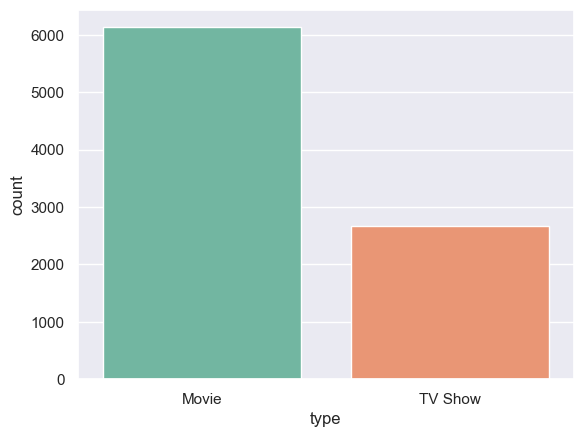

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, hue="type", palette="Set2", legend=False)

1)Movies dominate the collection with approximately 6,000 titles, making up the majority of the content.

2)TV Shows make up a smaller portion of the library with around 2,600 titles, less than half the number of movies.

<h3>if a producer wants to release some content, which month must he do so?( Month when least amount of content is added)</h3>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

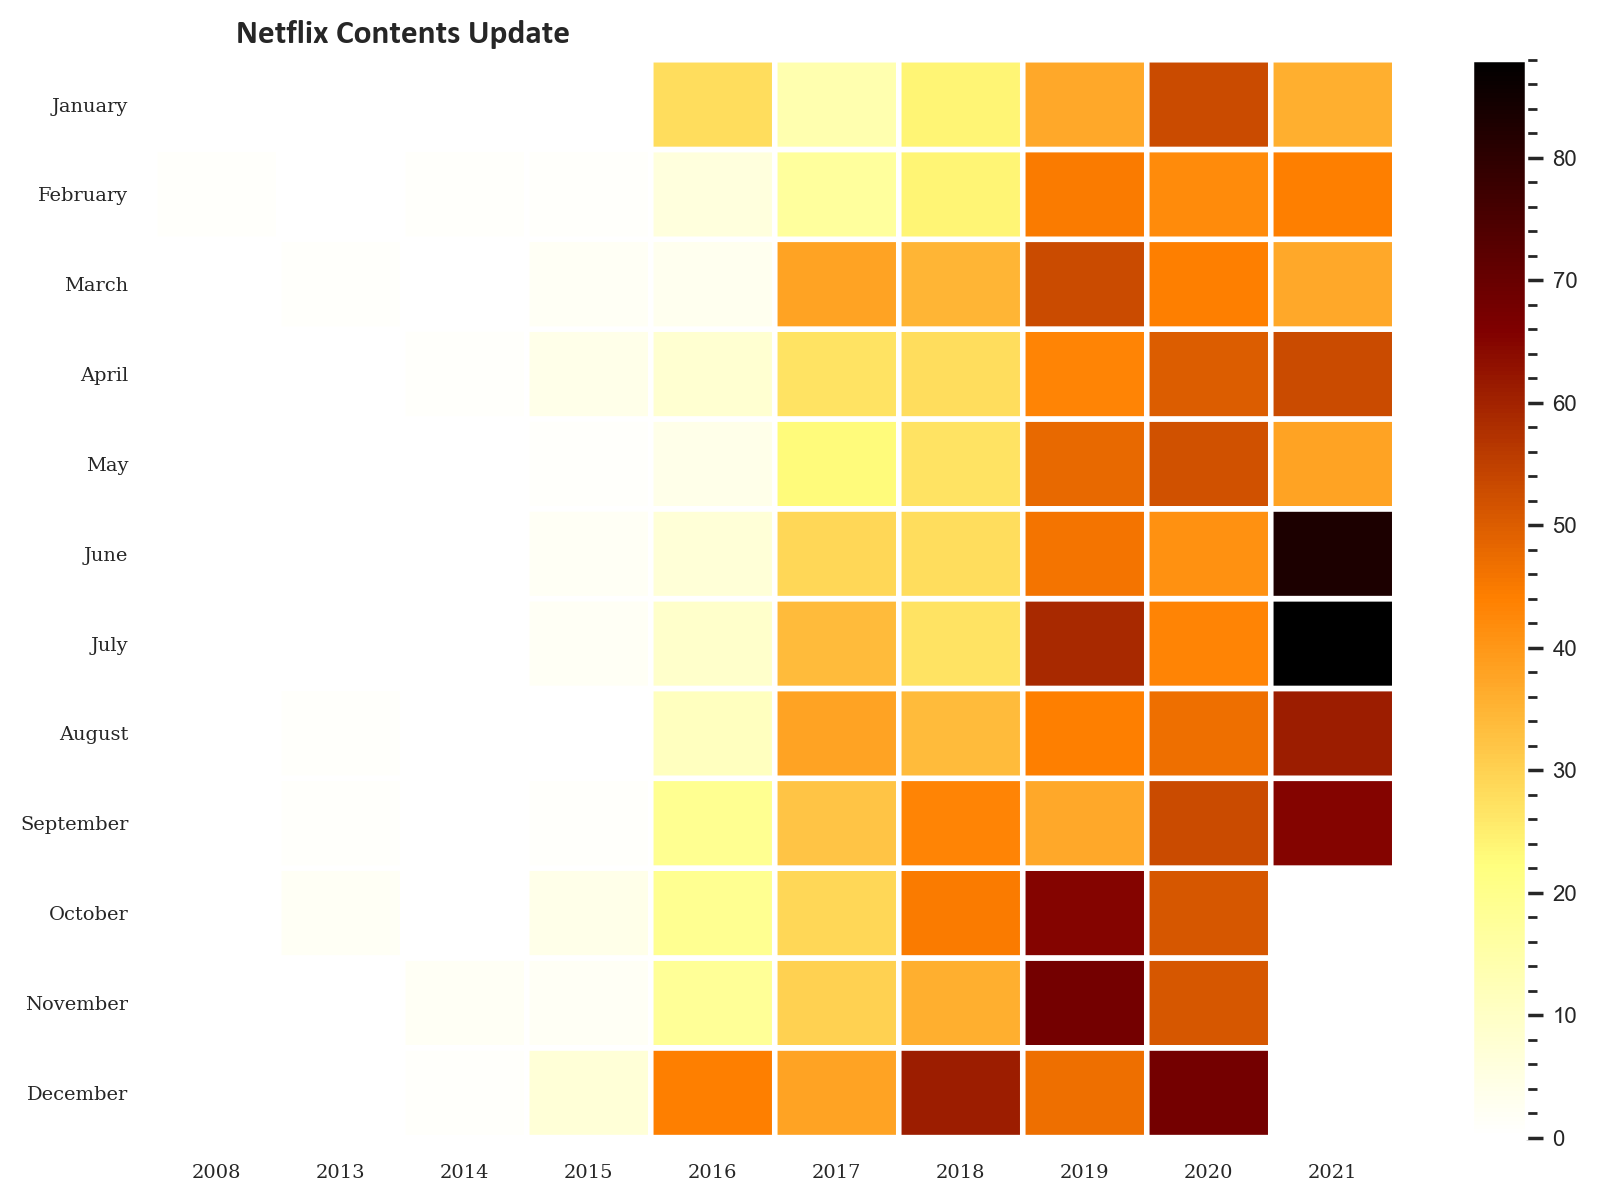

In [ ]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

<h3>Movie ratings analysis</h3>

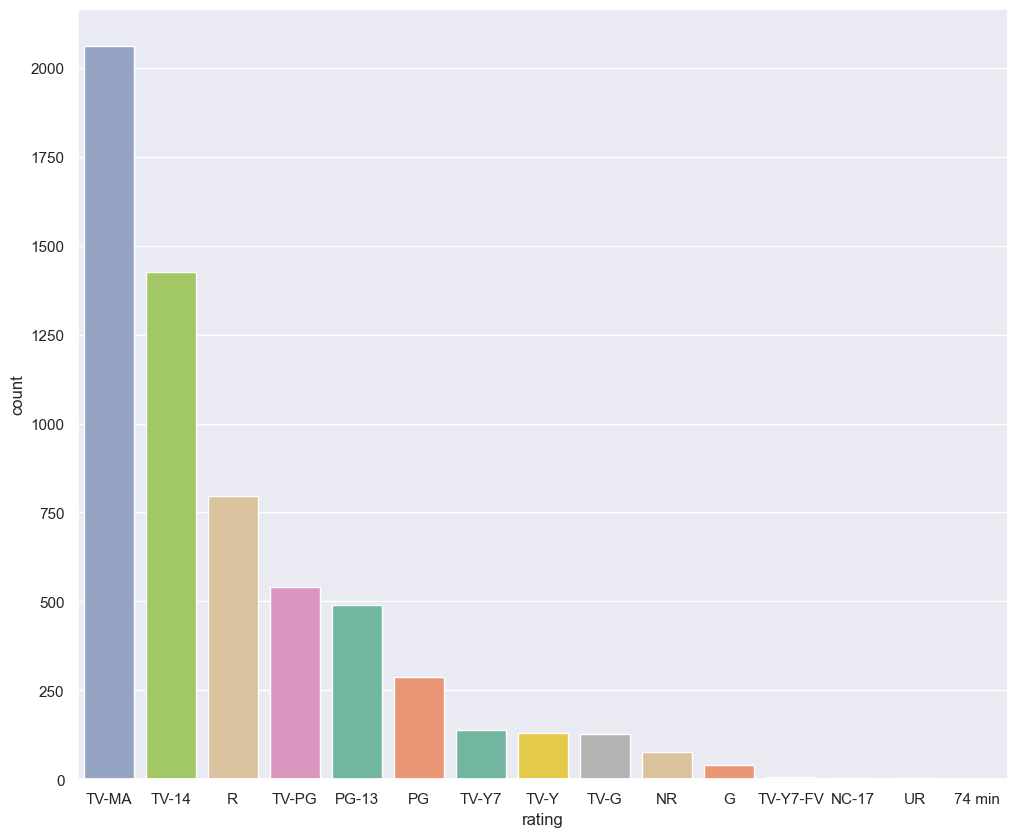

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(
    x="rating",
    data=netflix_movies,
    hue="rating",  # Assign `x` to `hue`
    palette="Set2",
    order=netflix_movies['rating'].value_counts().index[0:15],
    legend=False  # Disable legend for `hue` if unnecessary
)

This bar chart shows the distribution of content ratings across what appears to be a media library or streaming platform.



*   Adult and teen-oriented content (TV-MA, TV-14, R) dominates the library

*   TV-MA (Mature Audience) leads with approximately 2,000 titles, suggesting a large amount of adult-oriented content. TV-14 follows with about 1,400 titles, representing content suitable for teenagers. R (Restricted) has around 800 titles





<h3>Analysing IMDB ratings to get top rated movies on Netflix</h3>

In [ ]:
#JOIN IMDB RATINGS AND IMDB MOVIES CSV FILE
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title', 'year', 'genre'], low_memory=False)
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [ ]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

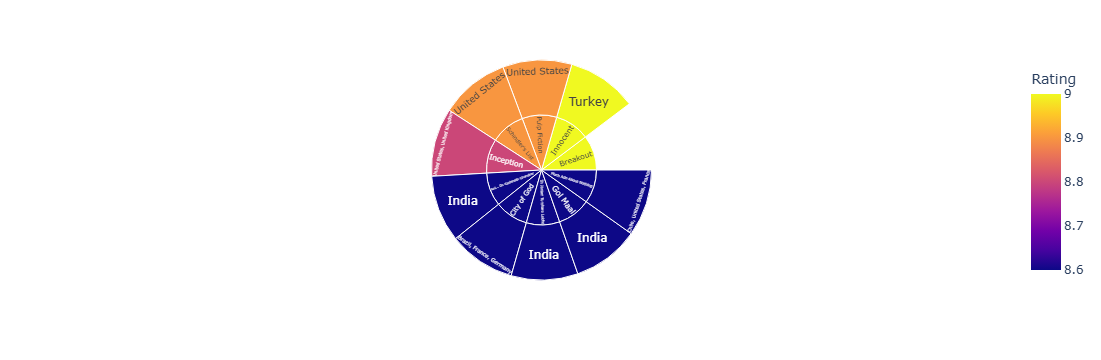

In [ ]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

Countries with highest rated content are turkey based on the donut chart above.

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

count
country                             
United States                    865
India                            718
United Kingdom                   119
Canada                            57
Philippines                       50
Spain                             41
South Korea                       38
Indonesia                         38
France                            37
United Kingdom, United States     31
Nigeria                           31

Each movies produced by each countries

**MOVIES PRODUCED EACH YEAR ANALYSIS**

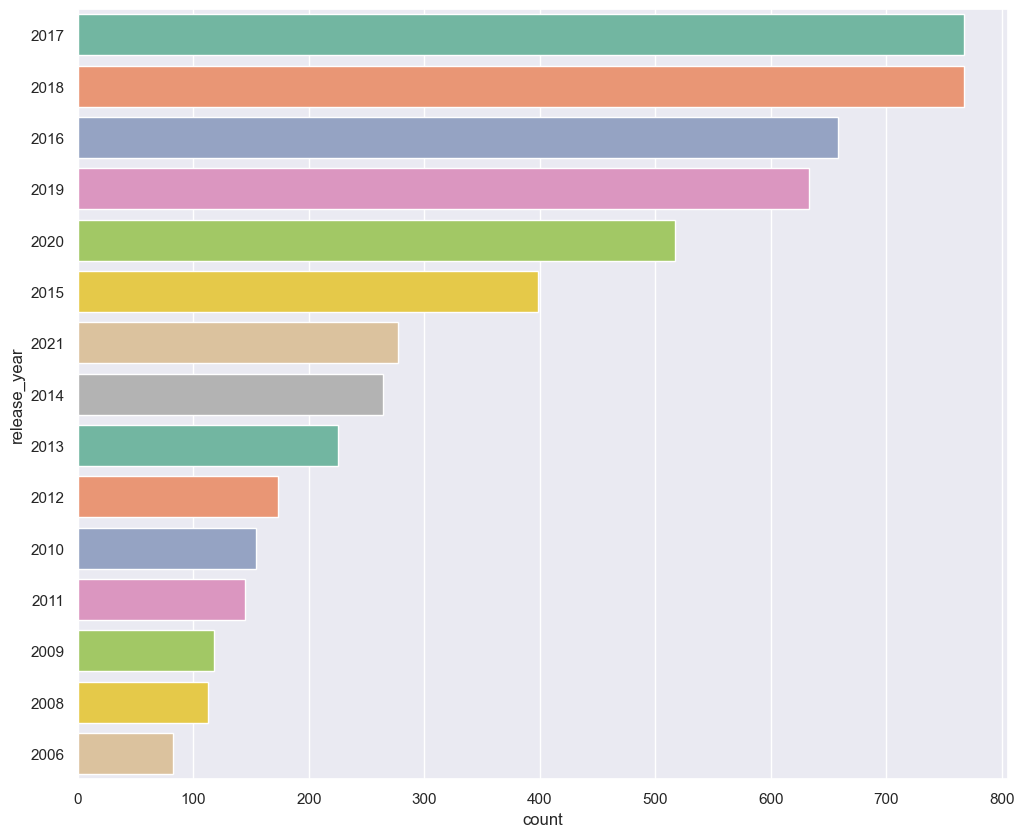

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

movies released each year regardless the category. So, 2017 was the year when most of the movies were released.

**WHAT IS THE TOP 10 MOVIE COUNT PRODUCED FROM EACH COUNTRIES**

In [ ]:
# Create an empty dictionary to store the country counts
countries = {}

# Fill missing values in the 'country' column of the Netflix dataset with 'Unknown'
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')

# Convert the 'country' column into a list
cou = list(netflix_movies['country'])

# Loop through each country in the 'cou' list
for i in cou:
    i = list(i.split(','))

    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:

            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [ ]:
# Create an empty dictionary to store the final country counts after cleaning up spaces
countries_fin = {}

# Loop through each country and its count in the 'countries' dictionary
for country, no in countries.items():
    country = country.replace(' ', '')

    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

# Sort the 'countries_fin' dictionary by its values (the count of countries), in descending order
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

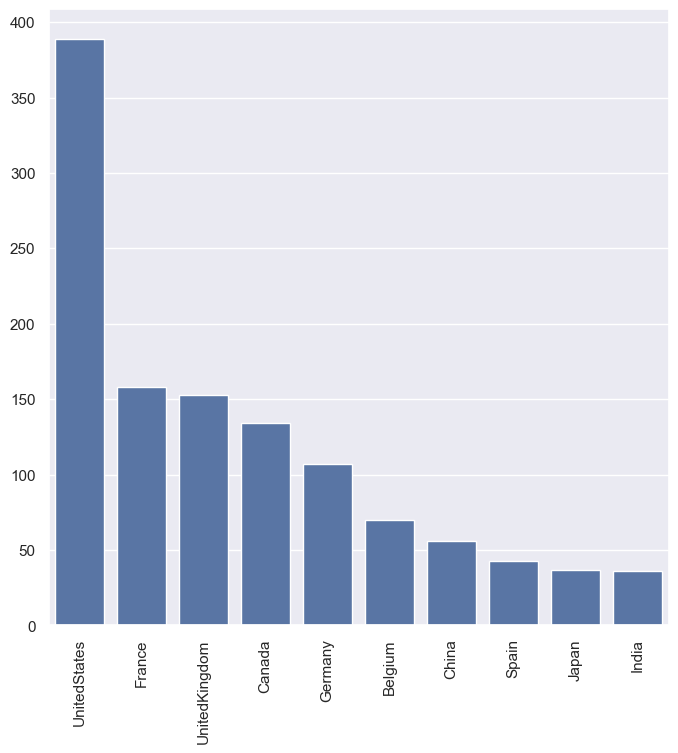

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

The main thing this graph shows is that the United States makes more than twice as many shows as any other country. There's a clear pattern where the numbers get smaller as we move from left to right on the graph, showing how production numbers decrease across different countries.

*   The United States makes the most content - about 380 movies or shows.
*   France and the United Kingdom come in second, each making about 150 shows

*   Canada is next with about 130 shows
*   Germany produces about 100 shows

*   Belgium makes about 70 shows
*   The remaining countries (China, Spain, Japan, and India) each make fewer than 60 shows







In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')  # Remove ' min'
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')  # Convert to numeric
netflix_movies = netflix_movies.dropna(subset=['duration'])  # Remove rows where 'duration' is NaN
netflix_movies['duration'] = netflix_movies['duration'].astype(int)  # Convert to int

<Axes: xlabel='duration', ylabel='Density'>

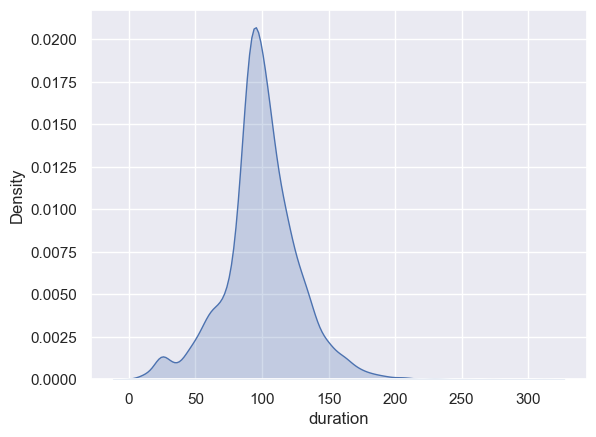

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

This graph shows the distribution of movie lengths on Netflix. The peak of the curve occurs around 90-100 minutes, indicating this is the most common movie duration. The graph demonstrates that:

1. Most movies cluster between 75-120 minutes in length
2. There's a sharp drop-off after 150 minutes, showing that very long movies are relatively rare
3. There are very few movies shorter than 60 minutes or longer than 180 minutes
4. The distribution is asymmetric (skewed right), meaning while there are some longer movies, they become increasingly uncommon as the duration increases

**Lollipop plot of Genres vs their count on Netflix**

In [ ]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

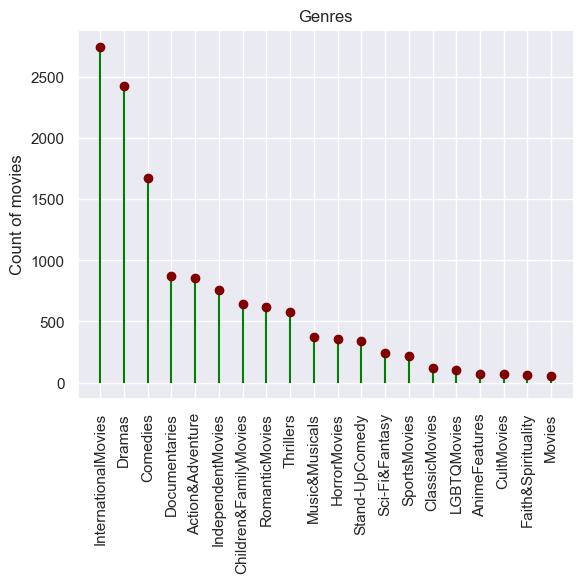

<Figure size 1000x1000 with 0 Axes>

In [ ]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

This lolipop plot chart illustrates the genre distribution in what appears to be a streaming platform's movie catalog. International Movies dominate with approximately 2,700 titles. Faith & Spirituality, Cult Movies, and general Movies have the smallest collections with less than 100 titles each

**Analysis of TV SERIES on Netflix**

In [ ]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [ ]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arrival delay (in minutes)')

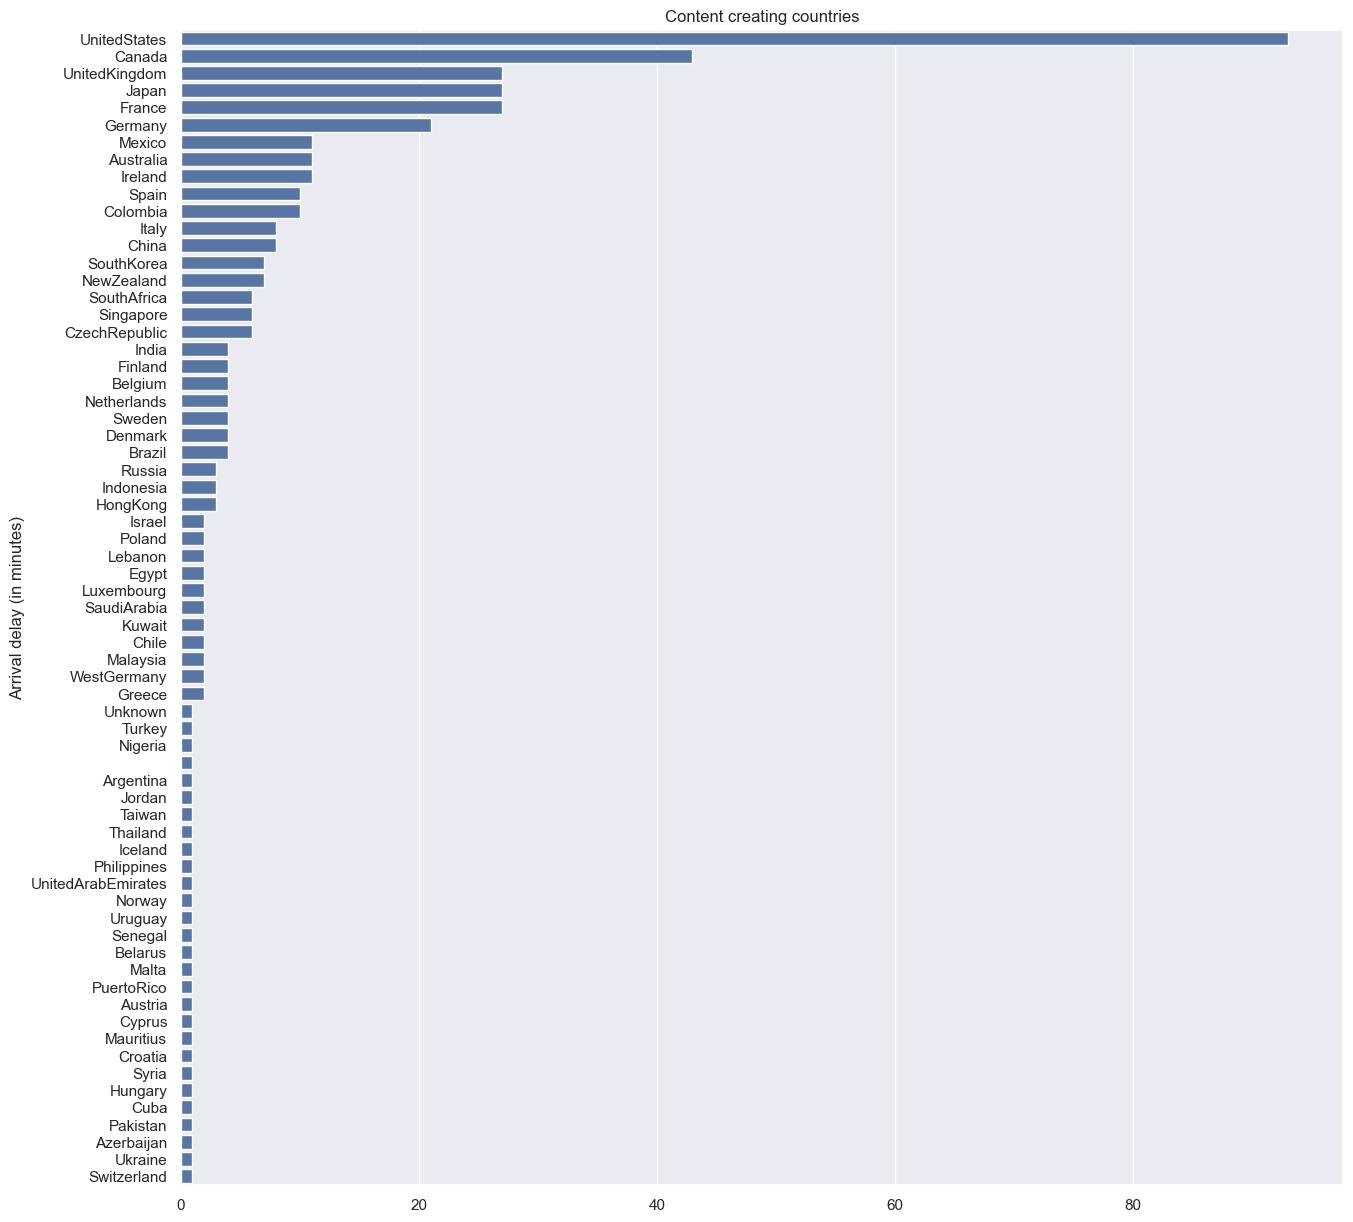

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Based on the bar chart above, United States has the most content that is created on netflix in the tv series category.

<h3>TV shows with largest number of seasons</h3>

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

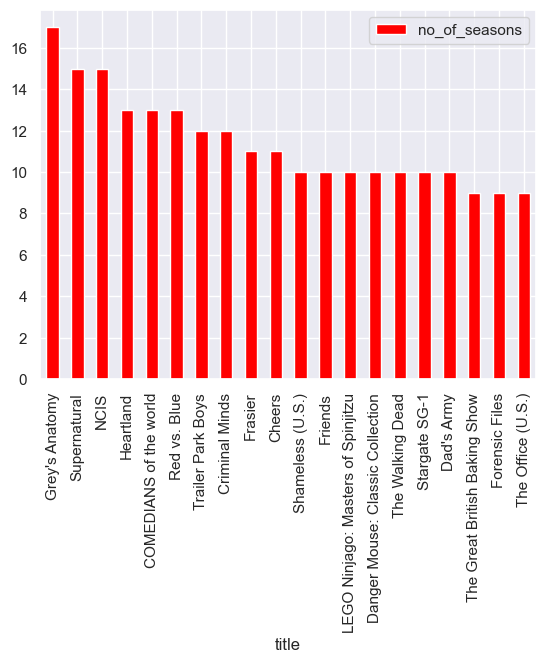

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

<p style="font-size:16px;">NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons as referred from the bar graph</p>

<h3>Lowest number of seasons.</h3>

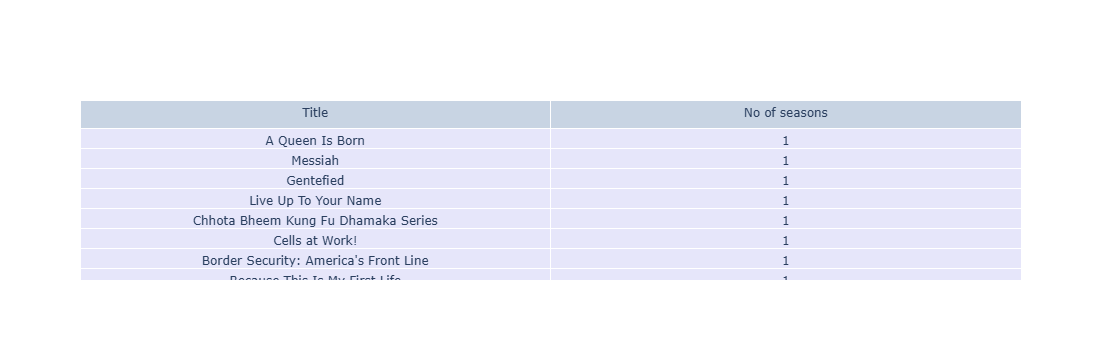

In [ ]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

<p style="font-size:16px;">The figure above shows the lowest number of seasons from each series in netflix. Hence, the lowest number of seasons is 1.</p>

<h3> what is the Top Duration of TV Series Seasons distributed among viewers?</h3>

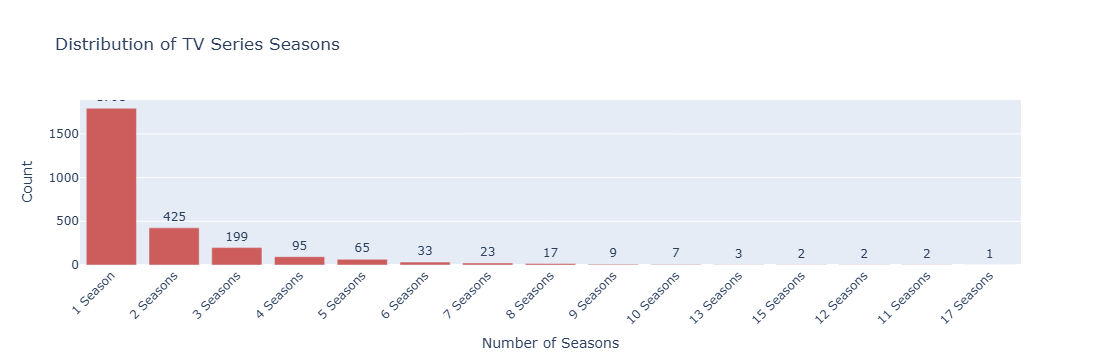

In [ ]:
# Filter the dataframe to include only series seasons
series_seasons = netflix_overall[netflix_overall['duration'].str.contains(r'Season[s]?$', regex=True, na=False)]

# Count the frequency of each season duration
season_counts = pd.value_counts(series_seasons['duration'])

# Sort the counts to display in descending order
season_counts_sorted = season_counts.sort_values(ascending=False)

# Create a bar chart using plotly.graph_objects
fig = go.Figure([
    go.Bar(
        x=season_counts_sorted.index,
        y=season_counts_sorted.values,
        text=season_counts_sorted.values,
        marker_color='indianred'
    )
])

# Configure the text labels and layout
fig.update_traces(
    texttemplate='%{text:.0f}',  # Display full integer values
    textposition='outside'
)

fig.update_layout(
    title='Distribution of TV Series Seasons',
    xaxis_title='Number of Seasons',
    yaxis_title='Count',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    bargap=0.2,  # Add some gap between bars
)

# Display the figure
fig.show()

-Most TV shows (about above 1,500) have only 1 season

-The second most common are shows with 2 seasons (425 shows)

-Shows with 3 seasons come next (199 shows)



